Skład grupy:

Natalia Przewdzięk, 276052

Mateusz Skrzątek, 275975

Agata Stachnio, 268330

# Zadanie 4
## Warunkowa wartość oczekiwana

Użyte biblioteki:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## 1. Przypadek zmiennej $Z = XY + sinX$

Dla zmiennej losowej $Z = XY + sinX$, gdzie $X$, $Y$ iid oraz $E(Y) = 0 $ zachodzi zależność $E(Z|X) = sinX$. Pnoiżej porównano wartości empiryczne i teoretyczne $E(Z|X)$. Do sprawdzenia twierdzenia zawartego w poleceniu wzięto zmienne niezależne $X,Y \sim N(0,1)$ o długości próby równej $10^4$. 

Wartość teoretyczna została obliczona ze wzoru $sinX$, a empiryczna jako wartości oczekiane Z z wybraną stałą wartością X, a zmienną wartością Y.

In [2]:
size = 10**4
X = norm.rvs(0, 1, size)
Y = norm.rvs(0, 1, size)
# Wartości empiryczne wartość E(Z|X)
E_z = [np.mean(x * Y + np.sin(x)) for x in X]

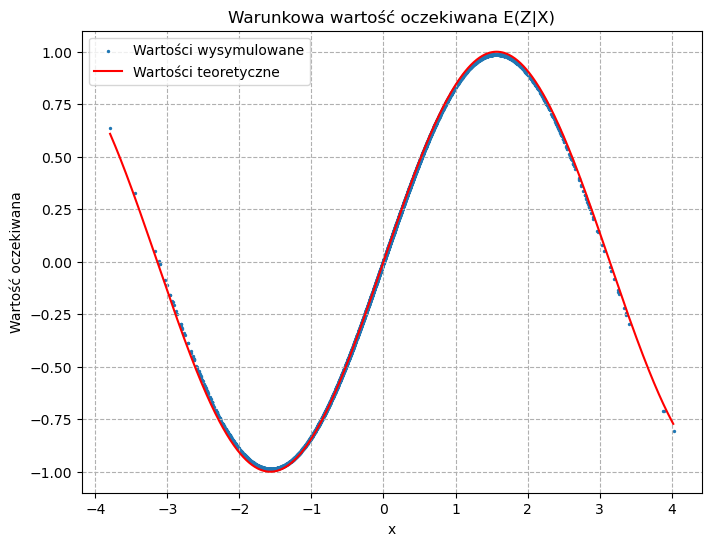

In [3]:
plt.figure(figsize=(8, 6))

plt.scatter(X, E_z, s=2, label="Wartości wysymulowane")
t = np.arange(min(X), max(X), 0.01)
plt.plot(t, np.sin(t), color="r", label="Wartości teoretyczne")

plt.grid(linestyle="--")
plt.title("Warunkowa wartość oczekiwana E(Z|X)")
plt.xlabel("x")
plt.ylabel("Wartość oczekiwana")
plt.legend(loc="upper left")

## 2. Przypadek procesu Poissona

Dla procesu Poisssona $N(t)$ o intensywności $\lambda$ zachodzi $E(N_t|N_T) = \frac{tN_t}{N_T}$ dla $t \in [0,T]$.Jako teoretyczne przybliżenie tej waartości wzięto powyższy wzór, natomiast wartość empiryczna została wyznaczona z n wysymulowanych trajektorii Poissona, dla których wyznaczono średnie wartości $N_t$ dla stałych wartości T.

Funkcja generująca proces Poissona:

In [4]:
def poisson_process(lamb: float = 10, T: float = 1) -> np.ndarray:
    """
    Funkcja generująca trajektorię procesu Poissona, zwraca czasy skoków.

    Args:
        lamb (float, opcjonalne): wartość parametru lambda. Domyślnie to 10.
        T (float, opcjonalne): czas generowanego procesu. Domyślnie to 1.

    Returns:
        np.ndarray: tablica zawierająca kolejne momenty skoków procesu.

    Examples:
        >>> poisson_process(5,1)
        array([0.        , 0.15744891, 0.28648513, 0.62496962, 1.32533362])
    """
    S = np.zeros(1)
    t = 0
    while t < T:
        t -= np.log(np.random.uniform(0, 1)) / lamb
        S = np.append(S, t)
    return S

Funkcja wyznaczająca empiryczną i teoretyczną wartość oczekiwaną:

In [5]:
def expected_Nt(lamb: float = 10, T: float = 1, size: int = 1000) -> tuple:
    """
    Zwraca wartości empiryczne i teoretyczne E(Nt|NT) procesu Poissona.

    Args:
        lamb (float, opcjonalne): wartość parametru lambda procesu Poissona.
            Domyślnie 10.
        T (float, opcjonalne): czas działania procesu Poissona. Domyślnie 1.
        size (int, opcjonalne): ilość wygenerowanych procesów. Domyślnie 1000.

    Returns:
        tuple: krotka z dwiema listami zawierającymi wartości empiryczne
            oraz teoretyczne warunkowej wartości oczekiwanej dla przedziału
            czasu (0,T).

    Examples:
        >>> expected_Nt(5, 0.05)
        (array([1.   , 1.038, 1.089, 1.139, 1.195]),
        array([0.     , 0.01241, 0.02482, 0.03723, 0.04964]))
    """
    t = np.arange(0, T, 0.01)
    n = len(t)
    Sn = [None] * size
    E_emp = np.zeros(n)
    E_teor = np.zeros(n)
    for i in range(size):
        Sn[i] = poisson_process(lamb, T)

    for i in range(n):
        E_emp[i] = np.mean([(s <= t[i]).sum() - 1 for s in Sn])
        E_teor[i] = np.mean([t[i] * (len(s) - 1) / T for s in Sn])
    return E_emp, E_teor

Poniżej wyznaczono wykresy przedstawiające wartości oczekiwane dla różnych wartości $\lambda$.

In [6]:
E_emp1, E_teor1 = expected_Nt(10, 1)
E_emp2, E_teor2 = expected_Nt(25, 1)
E_emp3, E_teor3 = expected_Nt(50, 1)

t = np.arange(0, 1, 0.01)

Text(0.5, 1.05, 'Warunkowa wartość oczekiwana E($N_t|N_T$) procesu Poissona')

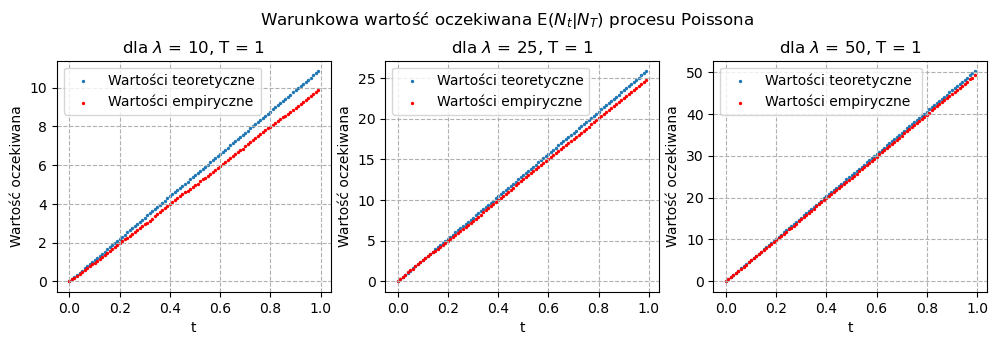

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(t, E_teor1, s=2, label="Wartości teoretyczne")
ax[0].scatter(t, E_emp1, s=2, color="r", label="Wartości empiryczne")
ax[0].grid(linestyle="--")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Wartość oczekiwana")
ax[0].set_title(r"dla $\lambda$ = 10, T = 1")
ax[0].legend(loc="upper left")

ax[1].scatter(t, E_teor2, s=2, label="Wartości teoretyczne")
ax[1].scatter(t, E_emp2, s=2, color="r", label="Wartości empiryczne")
ax[1].grid(linestyle="--")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Wartość oczekiwana")
ax[1].set_title(r"dla $\lambda$ = 25, T = 1")
ax[1].legend(loc="upper left")

ax[2].scatter(t, E_teor3, s=2, label="Wartości teoretyczne ")
ax[2].scatter(t, E_emp3, s=2, color="r", label="Wartości empiryczne")
ax[2].grid(linestyle="--")
ax[2].set_xlabel("t")
ax[2].set_ylabel("Wartość oczekiwana")
ax[2].set_title(r"dla $\lambda$ = 50, T = 1")
ax[2].legend(loc="upper left")

fig.suptitle("Warunkowa wartość oczekiwana E($N_t|N_T$) procesu Poissona", y=1.05)

Wartości empiryczne i teoretyczne nie pokrywają się dla małych wartości $\lambda$. Wraz ze wzrostem wartości $\lambda$, wartość empiryczna przyjmuje wartości bliższe wyznaczonej teoretycznej wartości. Może to wynikać z większej ilości skoków w procesie z większą $\lambda$ co czyni szacowanie dla 1000 wygenerownaych procesów dokładniejszym.

Poniżej wyznaczono wykresy przedstawiające wartości oczekiwane dla różnych wartości T.

In [8]:
E_emp1, E_teor1 = expected_Nt(10, 0.1)
E_emp2, E_teor2 = expected_Nt(10, 1)
E_emp3, E_teor3 = expected_Nt(10, 10)

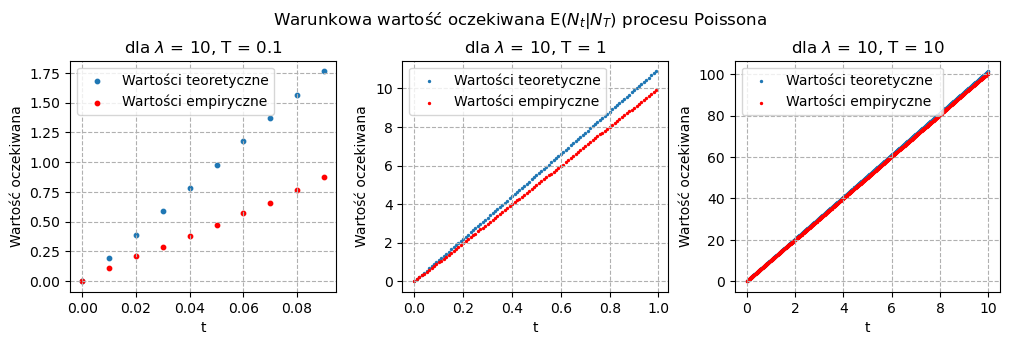

In [9]:
t1 = np.arange(0, 0.1, 0.01)
t2 = np.arange(0, 1, 0.01)
t3 = np.arange(0, 10, 0.01)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(t1, E_teor1, s=10, label="Wartości teoretyczne")
ax[0].scatter(t1, E_emp1, s=10, color="r", label="Wartości empiryczne")
ax[0].grid(linestyle="--")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Wartość oczekiwana")
ax[0].set_title(r"dla $\lambda$ = 10, T = 0.1")
ax[0].legend(loc="upper left")

ax[1].scatter(t2, E_teor2, s=2, label="Wartości teoretyczne")
ax[1].scatter(t2, E_emp2, s=2, color="r", label="Wartości empiryczne")
ax[1].grid(linestyle="--")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Wartość oczekiwana")
ax[1].set_title(r"dla $\lambda$ = 10, T = 1")
ax[1].legend(loc="upper left")

ax[2].scatter(t3, E_teor3, s=2, label="Wartości teoretyczne ")
ax[2].scatter(t3, E_emp3, s=2, color="r", label="Wartości empiryczne")
ax[2].grid(linestyle="--")
ax[2].set_xlabel("t")
ax[2].set_ylabel("Wartość oczekiwana")
ax[2].set_title(r"dla $\lambda$ = 10, T = 10")
ax[2].legend(loc="upper left")

fig.suptitle("Warunkowa wartość oczekiwana E($N_t|N_T$) procesu Poissona", y=1.05)
fig.subplots_adjust(wspace=0.25)

Dla większych wartości T wyniki teoretyczne pokrywają się z wartościami empirycznymi, zatem przybliżenie $E(N_t|N_T) = \frac{tN_t}{N_T}$ jest dla nich dokładniejsze.

## 3. Przypadek procesu Poissona z filtracją

In [10]:
def expected_Nt_given_Fs(
    lamb: float = 10, T: float = 10, s: float = 1, size: int = 1000
) -> tuple:
    """
    Zwraca wartości empiryczne i teoretyczne E(Nt|Fs) procesu Poissona.

    Args:
        lamb (float, opcjonalne): wartość parametru lambda procesu Poissona.
            Domyślnie 10.
        T (float, opcjonalne): czas działania procesu Poissona. Domyślnie 10.
        s (float, opcjonalne): chwila, w której znamy ilość skoków procesu.
            Domyślnie to 1.
        size (int, opcjonalne): ilość wygenerowanych procesów. Domyślnie 1000.

    Raises:
        ValueError: gdy podana wartość s przekracza wartość T.

    Returns:
        tuple: krotka z dwiema listami zawierającymi wartości empiryczne
            oraz teoretyczne warunkowej wartości oczekiwanej dla przedziału
            czasu (s,T).

    Examples:
        >>> expected_Nt_given_Fs(1, 0.1, 0.05)
        (array([0.054, 0.063, 0.075, 0.083, 0.099]),
        array([0.054, 0.064, 0.074, 0.084, 0.094]))
    """
    if s >= T:
        raise ValueError("unsuuported argument value")

    t = np.arange(s, T, 0.01)
    n = len(t)
    Sn = [None] * size
    E_emp = np.zeros(n)
    # generuj 1000 procesów Poissona
    for i in range(size):
        Sn[i] = poisson_process(lamb, T)
    # wyznacz śr. N_s oraz wart. oczek. teoretyczną
    # na jego podstawie
    N_s = np.mean([(s_n <= s).sum() - 1 for s_n in Sn])
    E_teor = N_s + lamb * (t - s)
    # dla każdego t zlicz ilość skoków
    for i in range(n):
        E_emp[i] = np.mean([(s_n <= t[i]).sum() - 1 for s_n in Sn])
    return E_emp, E_teor

Poniżej przedstawiono wyznaczone wartości warunkowej wartości oczekiwanej dla $\lambda = 5$ oraz $s = 1,2,3$ w przedziale $[s,5]$. Wartości teoretyczne uzyskane ze wzoru zawartego w treści zadania, oraz wartości empiryczne pokrywają się.

In [11]:
E_emp1, E_teor1 = expected_Nt_given_Fs(5, 5, 1)
E_emp2, E_teor2 = expected_Nt_given_Fs(5, 5, 2)
E_emp3, E_teor3 = expected_Nt_given_Fs(5, 5, 3)

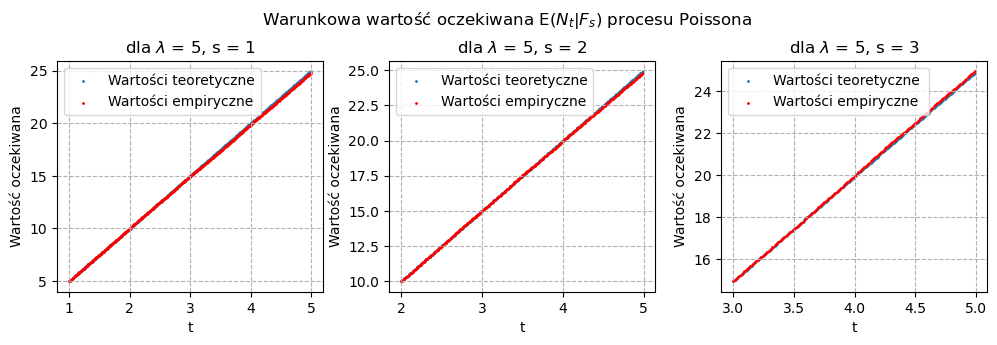

In [12]:
t1 = np.arange(1, 5, 0.01)
t2 = np.arange(2, 5, 0.01)
t3 = np.arange(3, 5, 0.01)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(t1, E_teor1, s=1, label="Wartości teoretyczne")
ax[0].scatter(t1, E_emp1, s=1, color="r", label="Wartości empiryczne")
ax[0].grid(linestyle="--")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Wartość oczekiwana")
ax[0].set_title(r"dla $\lambda$ = 5, s = 1")
ax[0].legend(loc="upper left")

ax[1].scatter(t2, E_teor2, s=1, label="Wartości teoretyczne")
ax[1].scatter(t2, E_emp2, s=1, color="r", label="Wartości empiryczne")
ax[1].grid(linestyle="--")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Wartość oczekiwana")
ax[1].set_title(r"dla $\lambda$ = 5, s = 2")
ax[1].legend(loc="upper left")

ax[2].scatter(t3, E_teor3, s=1, label="Wartości teoretyczne ")
ax[2].scatter(t3, E_emp3, s=1, color="r", label="Wartości empiryczne")
ax[2].grid(linestyle="--")
ax[2].set_xlabel("t")
ax[2].set_ylabel("Wartość oczekiwana")
ax[2].set_title(r"dla $\lambda$ = 5, s = 3")
ax[2].legend(loc="upper left")

fig.suptitle("Warunkowa wartość oczekiwana E($N_t|F_s$) procesu Poissona", y=1.05)
fig.subplots_adjust(wspace=0.25)